In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### create a plot of sigmoid function

Text(0, 0.5, 'σ (z)')

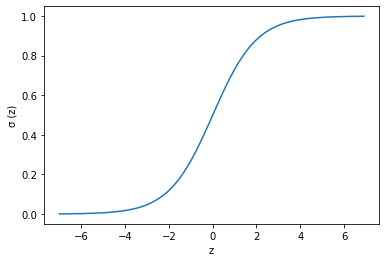

In [94]:
z = np.arange(-7, 7, 0.1)
y = 1 / (1 + np.exp(-z))
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('\u03C3 (z)')

### creating data for the manager-employee classifier

In [95]:
# create the dataframe
data = [[130000, 5, 'manager'], [150000, 6, 'manager'], [100000, 2, 'employee'], [90000, 3, 'employee'], [80000, 1, 'employee']]
df_data = pd.DataFrame(data, columns=('Salary', 'MeetingsPerDay', 'ManagerOrNot'))

In [96]:
print(df_data)

   Salary  MeetingsPerDay ManagerOrNot
0  130000               5      manager
1  150000               6      manager
2  100000               2     employee
3   90000               3     employee
4   80000               1     employee


In [97]:
# create the input X
df_X = df_data[['Salary', 'MeetingsPerDay']]

# create the output y
df_y = df_data[['ManagerOrNot']]

In [98]:
print(df_X)
print(df_y)

   Salary  MeetingsPerDay
0  130000               5
1  150000               6
2  100000               2
3   90000               3
4   80000               1
  ManagerOrNot
0      manager
1      manager
2     employee
3     employee
4     employee


### plot the manager-employee dataset

Text(0, 0.5, 'Meetings per Day')

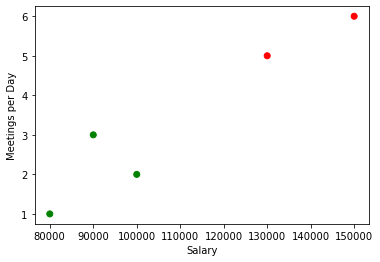

In [99]:
# create color code
color = ['red', 'red', 'green', 'green', 'green']
plt.scatter(df_X['Salary'], df_X['MeetingsPerDay'], c = color)
plt.xlabel('Salary')
plt.ylabel('Meetings per Day')

### solve for the logistic regression weights and intercept

In [92]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(df_X, df_y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [93]:
print(clf.coef_)
print(clf.intercept_)

[[-3.19008423e-05  1.03184231e+00]]
[-0.23989903]


In [77]:
clf.predict(df_X)

array(['manager', 'manager', 'employee', 'employee', 'employee'],
      dtype=object)

In [78]:
clf.predict_proba(df_X)

array([[0.31600274, 0.68399726],
       [0.23757361, 0.76242639],
       [0.79678149, 0.20321851],
       [0.5038619 , 0.4961381 ],
       [0.8532252 , 0.1467748 ]])

In [80]:
clf.predict_proba([[140000, 5]])

array([[0.38860149, 0.61139851]])

### produce the boundary line

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'cmp'
  


Text(0, 0.5, 'Meetings per Day')

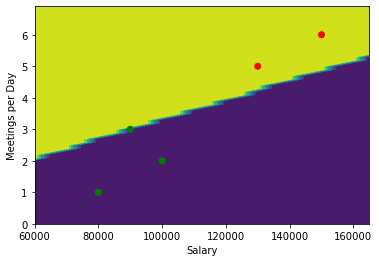

In [91]:
x1grid = np.arange(df_X['Salary'].min() - 20000, df_X['Salary'].max() + 20000, 5000)
x2grid = np.arange(df_X['MeetingsPerDay'].min() - 1, df_X['MeetingsPerDay'].max() + 1, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape(len(r1), 1), r2.reshape(len(r2), 1)

grid = np.hstack((r1, r2))

zz = clf.predict(grid).reshape(xx.shape) == 'manager'

## plot the grid
plt.contourf(xx, yy, zz, cmp = 'Paired')
plt.scatter(df_X['Salary'], df_X['MeetingsPerDay'], c = color)
plt.xlabel('Salary')
plt.ylabel('Meetings per Day')
